# Praktični dio

   emails_sent  open_rate %  click_rate %  revenue €  sales_rate_mail%  sales
0         3135        23.76          0.22      158.6          0.001276      4
1         4832        39.56          0.82      103.0          0.000621      3
2         3050        20.85          0.16       65.4          0.000656      2
3         4856        41.41          1.09       85.6          0.000412      2
4         3249        22.49          0.27        0.0          0.000000      0
Mean Absolute Error: 11.014199492837218
Mean Squared Error: 244.54277219062686
R-squared: 0.9651221976090653
Lasso Regression MSE: 232.92413830045527
Lasso Regression R-squared: 0.9667793000179564
Optimal lambda (alpha) for Lasso: 1.0


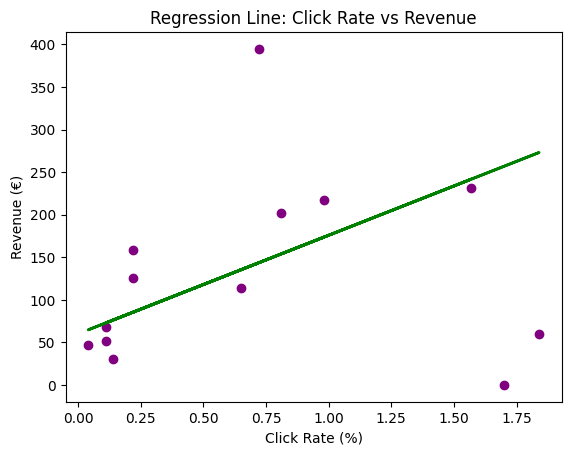

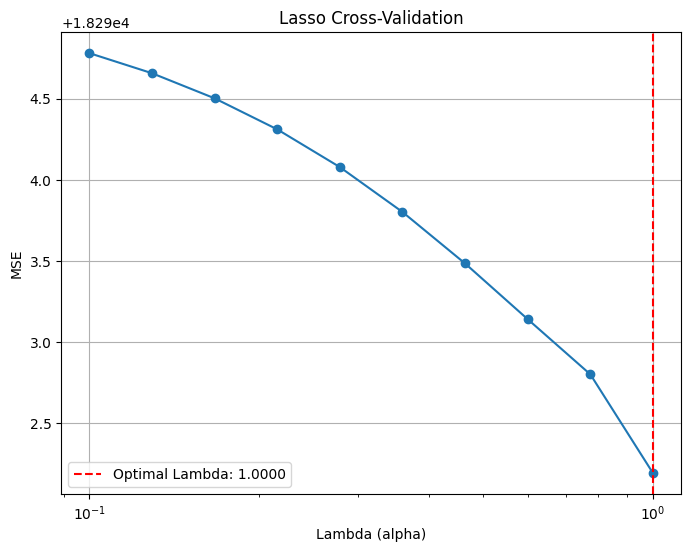

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
data = pd.read_excel('/Users/martav/Desktop/Završni/Praktični/TablicaF.xlsx')
print(data.head())
features = ['emails_sent', 'open_rate %', 'click_rate %', 'sales_rate_mail%', 'sales']
target = 'revenue €'

# priprema podataka 
X = data[features].fillna(data[features].mean())
y = data[target].fillna(data[target].mean())

from sklearn.model_selection import train_test_split
# podjela na test i train sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=32)

#skaliranje podataka
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# pokretanje i treniranje linearnog modela
model = LinearRegression()
model.fit(X_train, y_train)

#optimizacija Lasso metodom
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)
y_pred_lasso = lasso.predict(X_test_scaled)

# predikcija modela
y_pred = model.predict(X_test)

# evaluacija linearnog modela
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

#evaluacija Lasso regresije
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print("Lasso Regression MSE:", mean_squared_error(y_test, y_pred_lasso))
print("Lasso Regression R-squared:", r2_score(y_test, y_pred_lasso))

#izračun lambde (alphe) za Lasso
lasso_cv = LassoCV(alphas=np.logspace(-1, 0, 10), cv=5, random_state=42)
lasso_cv.fit(X_train, y_train)


# optimalna lambda za Lasso regresiju
optimal_lambda = lasso_cv.alpha_
print("Optimal lambda (alpha) for Lasso:", optimal_lambda)


X_single = X[['click_rate %']]
X_train_single, X_test_single, y_train, y_test = train_test_split(X_single, y, test_size=0.2, random_state=42)

# prilagodba parametara modela prema uzorku treniranih podataka
model_single = LinearRegression()
model_single.fit(X_train_single, y_train)

# predikcija pomoću linearnog modela
y_pred_single = model_single.predict(X_test_single)

# iscrtavanje prikaza grafa
import matplotlib.pyplot as plt
plt.scatter(X_test_single, y_test, color='purple')  # iscrtavanje podataka/točaka
plt.plot(X_test_single, y_pred_single, color='green', linewidth=2)  # iscrtavanje linije regresije
plt.xlabel('Click Rate (%)') #zavisna varijabla na x-osi
plt.ylabel('Revenue (€)') #ciljna varijabla na y-osi
plt.title('Regression Line: Click Rate vs Revenue')
plt.show()

# iscrtavanje prikaza Lasso CV i lambde
plt.figure(figsize=(8, 6))
plt.plot(lasso_cv.alphas_, np.mean(lasso_cv.mse_path_, axis=1), marker='o')
plt.xscale('log')
plt.axvline(optimal_lambda, linestyle='--', color='red', label=f'Optimal Lambda: {optimal_lambda:.4f}')
plt.xlabel('Lambda (alpha)')
plt.ylabel('MSE')
plt.title('Lasso Cross-Validation')
plt.legend()
plt.grid(True)
plt.show()



   emails_sent  open_rate %  click_rate %  revenue €  sales_rate_mail%  sales
0         3135        23.76          0.22      158.6          0.001276      4
1         4832        39.56          0.82      103.0          0.000621      3
2         3050        20.85          0.16       65.4          0.000656      2
3         4856        41.41          1.09       85.6          0.000412      2
4         3249        22.49          0.27        0.0          0.000000      0
Mean Absolute Error: 11.014199492837218
Mean Squared Error: 244.54277219062686
R-squared: 0.9651221976090653
Lasso Regression MSE: 232.92413830045527
Lasso Regression R-squared: 0.9667793000179564
Optimal lambda (alpha) for Lasso: 1.0


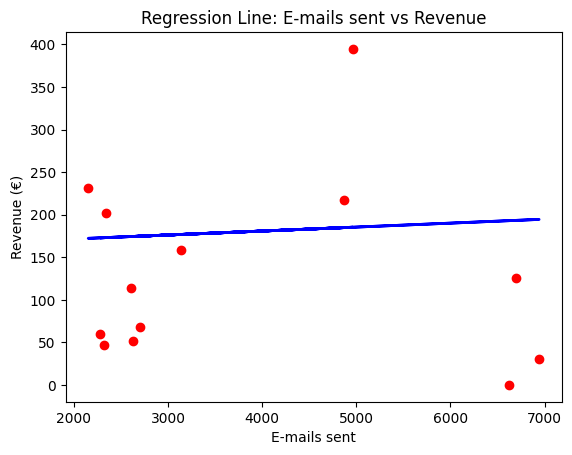

In [49]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
data = pd.read_excel('/Users/martav/Desktop/Završni/Praktični/TablicaF.xlsx')
print(data.head())
features = ['emails_sent', 'open_rate %', 'click_rate %', 'sales_rate_mail%', 'sales']
target = 'revenue €'

# priprema podataka 
X = data[features].fillna(data[features].mean())
y = data[target].fillna(data[target].mean())

from sklearn.model_selection import train_test_split
# podjela na test i train sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=32)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# pokretanje i treniranje linearnog modela
model = LinearRegression()
model.fit(X_train, y_train)

#optimizacija Lasso metodom
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)
y_pred_lasso = lasso.predict(X_test_scaled)

# predikcija modela
y_pred = model.predict(X_test)

# evaluacija linearnog modela
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

#evaluacija Lasso regresije
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print("Lasso Regression MSE:", mean_squared_error(y_test, y_pred_lasso))
print("Lasso Regression R-squared:", r2_score(y_test, y_pred_lasso))

#izračun lambde (alphe) za Lasso
lasso_cv = LassoCV(alphas=np.logspace(-1, 0, 10), cv=5, random_state=42)
lasso_cv.fit(X_train, y_train)


# optimalna lambda za Lasso regresiju
optimal_lambda = lasso_cv.alpha_
print("Optimal lambda (alpha) for Lasso:", optimal_lambda)

X_single = X[['emails_sent']]
X_train_single, X_test_single, y_train, y_test = train_test_split(X_single, y, test_size=0.2, random_state=42)

# prilagodba parametara modela prema uzorku treniranih podataka
model_single = LinearRegression()
model_single.fit(X_train_single, y_train)

# predikcija pomoću linearnog modela
y_pred_single = model_single.predict(X_test_single)

# iscrtavanje prikaza grafa
import matplotlib.pyplot as plt
plt.scatter(X_test_single, y_test, color='red')  # iscrtavanje podataka/točaka
plt.plot(X_test_single, y_pred_single, color='blue', linewidth=2)  # iscrtavanje linije regresije
plt.xlabel('E-mails sent') #zavisna varijabla na x-osi
plt.ylabel('Revenue (€)') #ciljna varijabla na y-osi
plt.title('Regression Line: E-mails sent vs Revenue')
plt.show()
